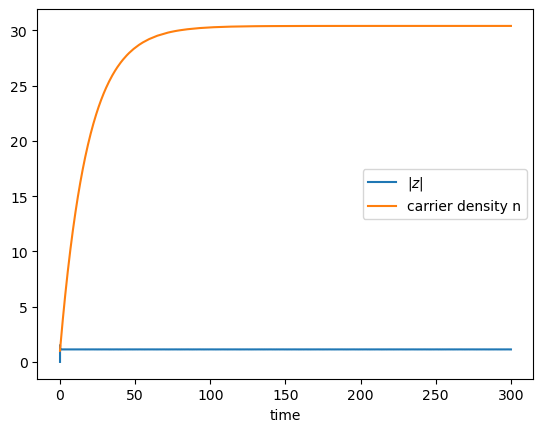

Text(0, 0.5, '$E=|z|^2$')

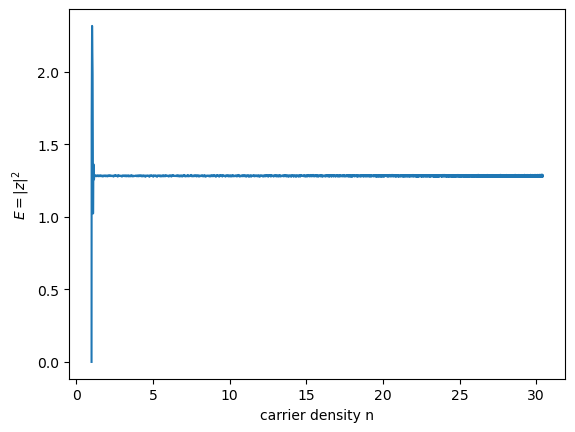

In [175]:
from scipy.integrate import complex_ode
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
#import cmath
import math
## 同时解两个微分方程，得到的cavity能量E没有bistability,需要在input上升和下降两个方向积分
def CMT2(t,Y,Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD):
    z = Y[0]
    n = Y[1]
    dzdt = -(k_T/2+1j*(Delta+chi*abs(z)**2))*z-math.sqrt(k)*u 
    +1j*(n+sigma_FCD*n**0.8)*z - (gamma_TPA*abs(z)**2+gamma_FCA*n)*z
    dndt = abs(z)**4-n/tau
    return [dzdt, dndt]

chi = 0.55
tau=18.5
k_l=50 * abs(chi)
k = 150 * abs(chi)
k_T=k+k_l
Delta_th= -math.sqrt(3)/2.0 * k_T
gamma_TPA=0.11
gamma_FCA=0.2
sigma_FCD=7.2
# choose Delta and set the range of imput pump amplitude 
Delta=150
# initial points 
y0 = [0+0j, 1.0+0j]
t_span=[0,300]

# test 
u=20
m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
sol=solve_ivp(CMT2, t_span, y0, args=m)
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|$')
plt.plot(sol.t,sol.y[1,:],label='carrier density n')
plt.xlabel('time')
plt.legend()
plt.show()
plt.plot(sol.y[1,:],abs(sol.y[0,:])**2)  # n vs |u| 
plt.xlabel('carrier density n')
plt.ylabel('$E=|z|^2$')

From the test with u=0 above, we can see that the E converges very fast within 10 time unit, while the carrier density requires much longer. The second picture shows that n stabilized when it reached value of 30, which corresponds to the time 200 approximately. So we will observe their dynamics separately so that we can see the change of E more closely.

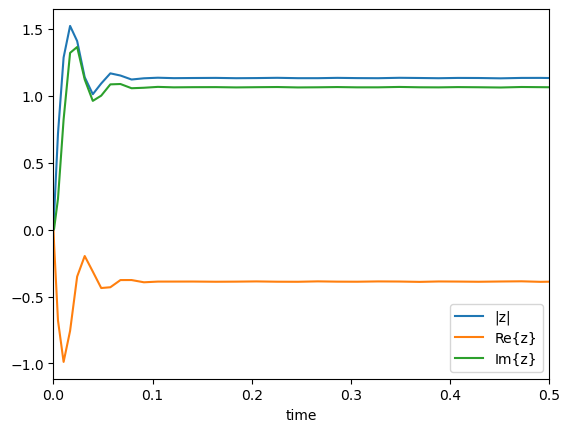

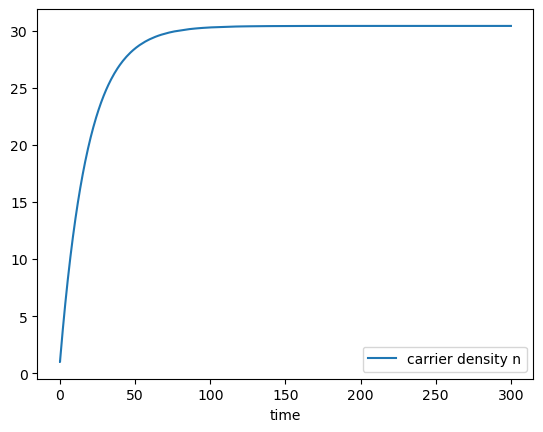

In [178]:
plt.plot(sol.t, abs(sol.y[0,:]),label='|z|')
plt.plot(sol.t, sol.y[0,:].real,label='Re{z}')
plt.plot(sol.t, sol.y[0,:].imag,label='Im{z}')
plt.xlim(0,0.5)
plt.xlabel('time')
plt.legend()
plt.show()
plt.plot(sol.t,sol.y[1,:],label='carrier density n')
plt.xlabel('time')
plt.legend()
plt.show()

At equilibrium, the n is (0.00019331000183901308+0j), and the complex amplitude in cavity z is (-0.019712699548807444+0.05340214884382544j)


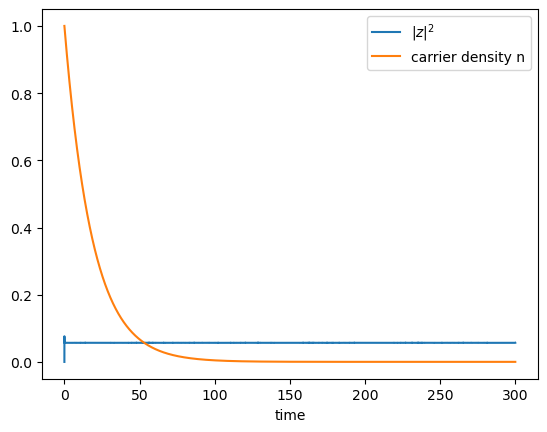

Text(0, 0.5, '$E=|z|^2$')

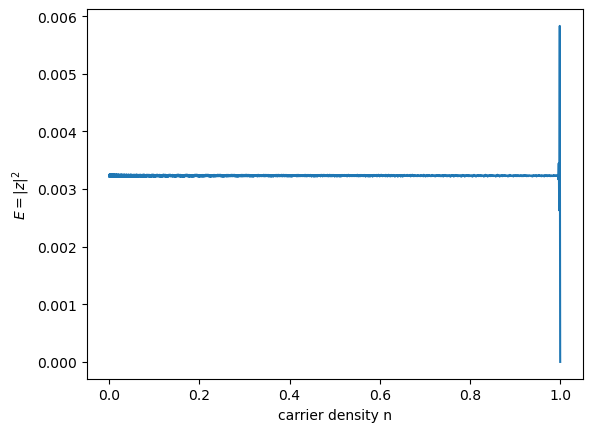

In [182]:
# test 
u=1
m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
sol=solve_ivp(CMT2, t_span, y0, args=m)
print("At equilibrium, the n is {0}, and the complex amplitude in cavity z is {1}".format(sol.y[1,-1],sol.y[0,-1]))
plt.plot(sol.t, abs(sol.y[0,:]),label='$|z|^2$')
plt.plot(sol.t,sol.y[1,:],label='carrier density n')
plt.xlabel('time')
plt.legend()
plt.show()
plt.plot(sol.y[1,:],abs(sol.y[0,:])**2)  # n vs |u| 
plt.xlabel('carrier density n')
plt.ylabel('$E=|z|^2$')

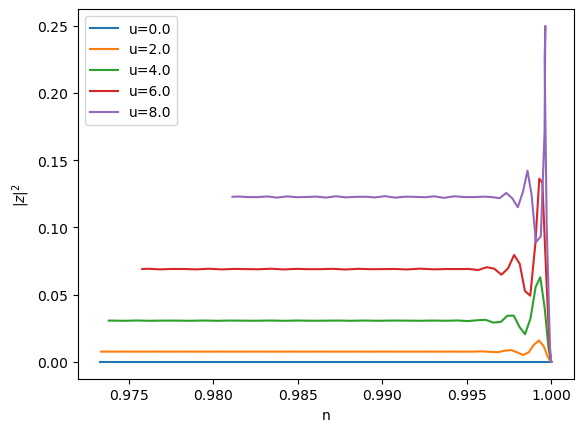

In [184]:
Delta=200
u=np.arange(0,10,2)
# initial points 
y0 = [0+0j, 1.0+0j]
t_span=[0,0.5]
res=[]
for i in u: 
    m=[Delta,i,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    sol=solve_ivp(CMT2, t_span, y0, args=m)
    res.append(abs(sol.y[0,-1]))# append the last value which already evolved over time 
    plt.plot(sol.y[1,:],abs(sol.y[0,:])**2,label='u={:.1f}'.format(i))  # n vs |u| 
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend()

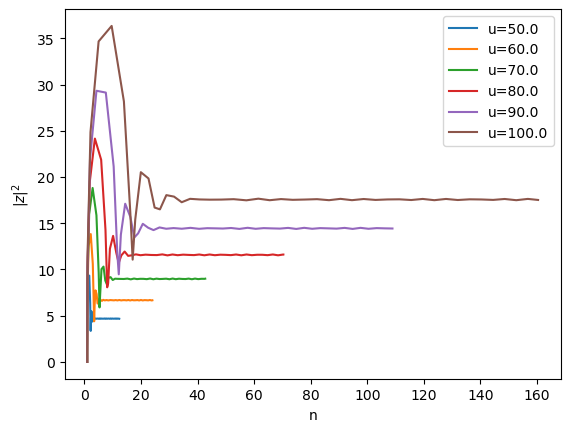

In [186]:
Delta=200
u=np.arange(50,101,10)
# initial points 
y0 = [0+0j, 1.0+0j]
t_span=[0,0.5]
res=[]
for i in u: 
    m=[Delta,i,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    sol=solve_ivp(CMT2, t_span, y0, args=m)
    res.append(abs(sol.y[0,-1]))# append the last value which already evolved over time 
    plt.plot(sol.y[1,:],abs(sol.y[0,:])**2,label='u={:.1f}'.format(i))  # n vs |u| 
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend()

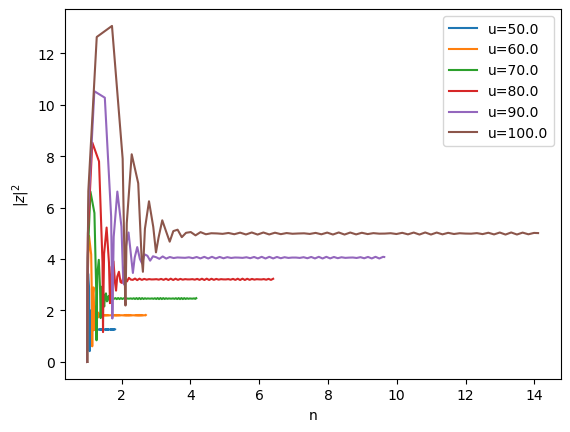

In [188]:
Delta=400
u=np.arange(50,101,10)
# initial points 
y0 = [0+0j, 1.0+0j]
t_span=[0,0.5]
res=[]
for i in u: 
    m=[Delta,i,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    sol=solve_ivp(CMT2, t_span, y0, args=m)
    res.append(abs(sol.y[0,-1]))# append the last value which already evolved over time 
    plt.plot(sol.y[1,:],abs(sol.y[0,:])**2,label='u={:.1f}'.format(i))  # n vs |u| 
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend()

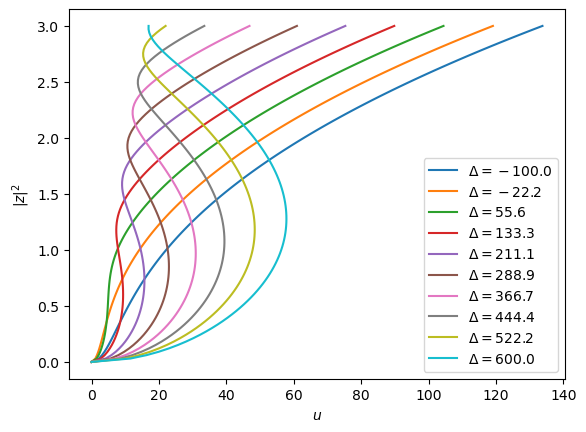

In [190]:
## experiment to see with which Delta there is finally bistability (because analytical is much fast)
import math
## fully analytical 
## substitute n0 and solve dzdt=0 by hand: fast, but against reality, change E as variable instead of P
## and we scale E linearly instead of P, so the exact plotted points are different
Delta=np.linspace(-100,600,10)
lower_limit = 0
upper_limit = 3
num_pts = 100
E = np.linspace(lower_limit, upper_limit, num_pts)
#start = time.time()
for j in Delta:
    u_list=[]
    for i in E:
        #print('stable n is: {:.5f}'.format(18.5*abs(i)**2 ))
        P = ((k_T/2 + gamma_TPA*i + gamma_FCA * (18.5*abs(i)**2 ))**2 + (j + chi*i-(18.5*abs(i)**2 )-sigma_FCD*(18.5*abs(i)**2 )**0.8)**2)*i/k
        u_list.append(math.sqrt(P))
    plt.plot(u_list,E,label='$\Delta = {:.1f}$'.format(j))

plt.xlabel('$u$')
plt.ylabel('$|z|^2$')
plt.legend()
#end = time.time()
#print('Time elapse: {:.1f} min'.format((end - start)/60))

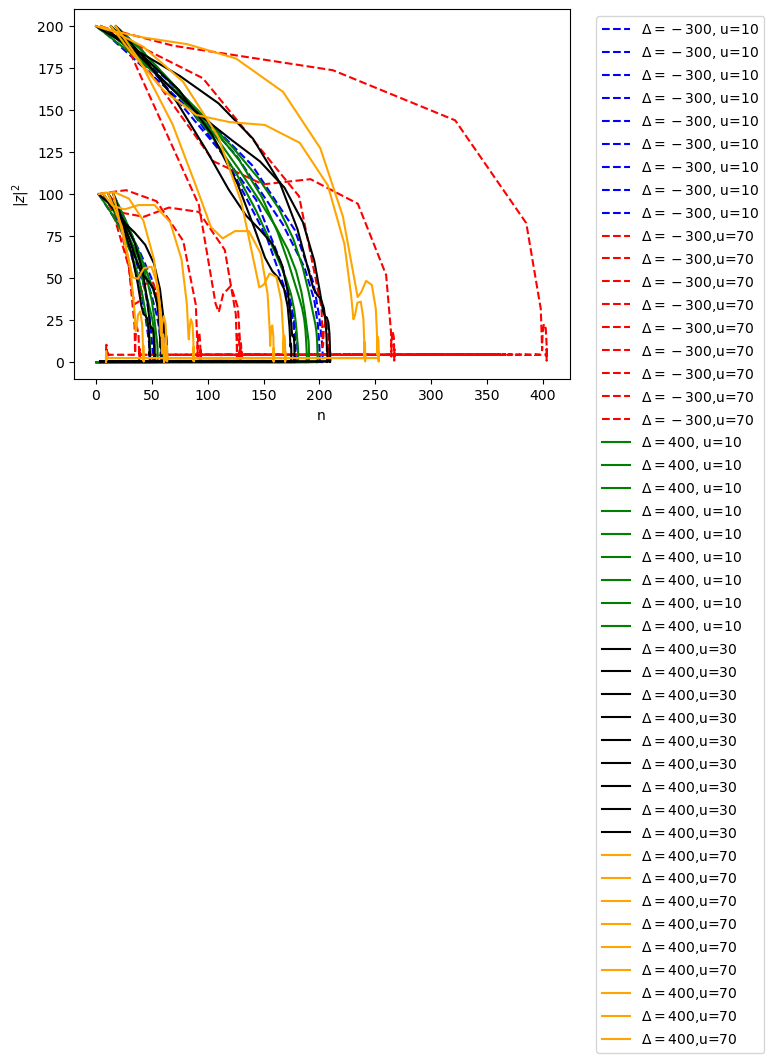

In [192]:
Delta=-300
u=10
#random initial points -- phase diagram
n0=np.linspace(0,20,10)
z0=[]
for i in np.linspace(-10,10,3):
    for j in np.linspace(-10,10,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0))
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b--',label='$\Delta=-300$, u=10')
u=70
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'r--',label='$\Delta=-300$,u=70')

Delta=400
u=10
#random initial points -- phase diagram
n0=np.linspace(0,20,10)
z0=[]
for i in np.linspace(-10,10,3):
    for j in np.linspace(-10,10,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0))
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,color='green',label='$\Delta=400$, u=10')
u=30
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,color='black',label='$\Delta=400$,u=30')    
u=70
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,color='orange',label='$\Delta=400$,u=70')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

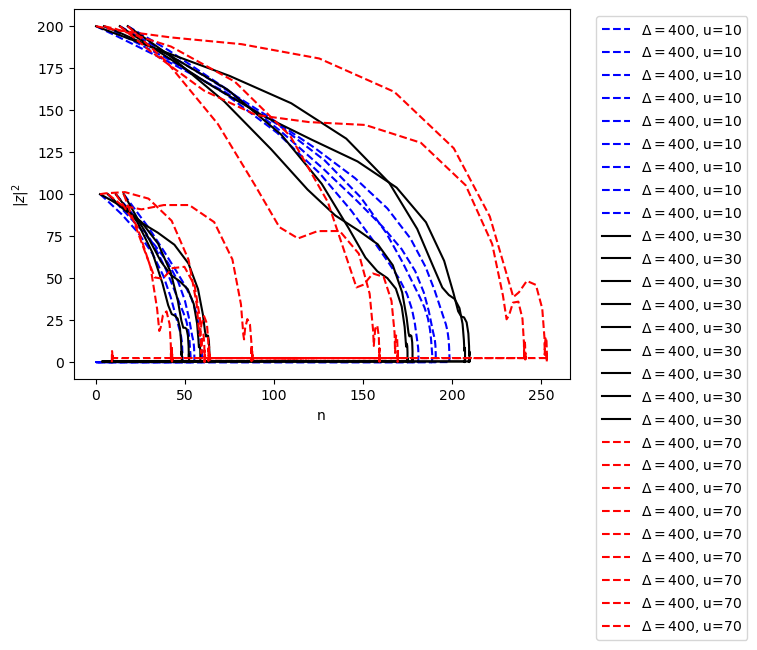

In [194]:
Delta=400
u=10
#random initial points -- phase diagram
n0=np.linspace(0,20,10)
z0=[]
for i in np.linspace(-10,10,3):
    for j in np.linspace(-10,10,3):
        z0.append(complex(i, j))
y0_list=list(zip(z0,n0))
#print(len(y0_list))
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b--',label='$\Delta=400$, u=10')
u=30 # there should be bistability with u = 30
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,color='black',label='$\Delta=400$, u=30')
u=70
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'r--',label='$\Delta=400$, u=70')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

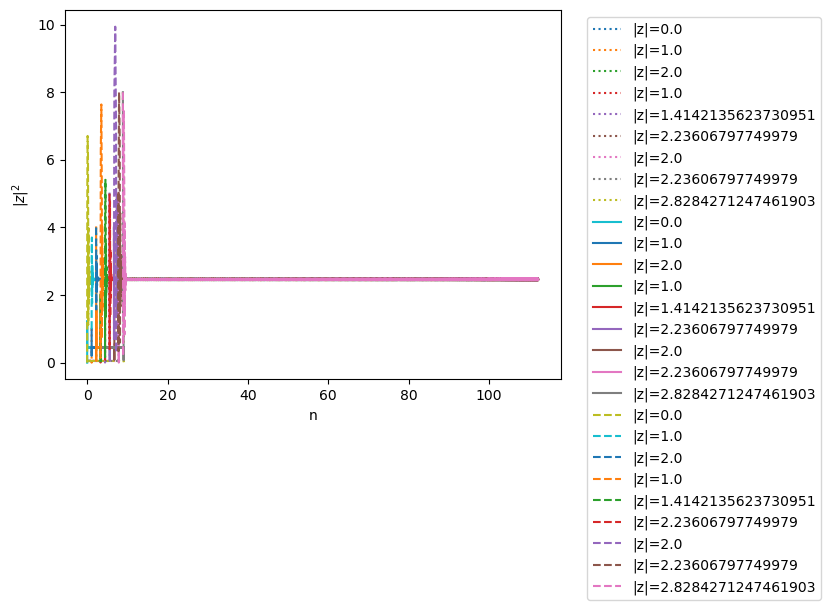

In [208]:
Delta=400
u=10
#random initial points -- phase diagram
n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,':',label='|z|={}'.format(abs(i[0])))
u=30
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'-',label='|z|={}'.format(abs(i[0])))
u=70
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'--',label='|z0|={}'.format(abs(i[0])))
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

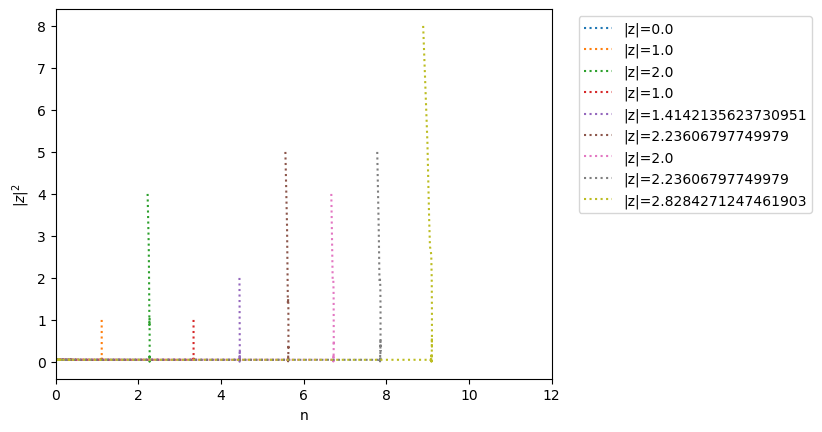

In [212]:
Delta=400
u=10
#random initial points -- phase diagram
n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,':',label='|z0|={}'.format(abs(i[0])))

plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.xlim(0,12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

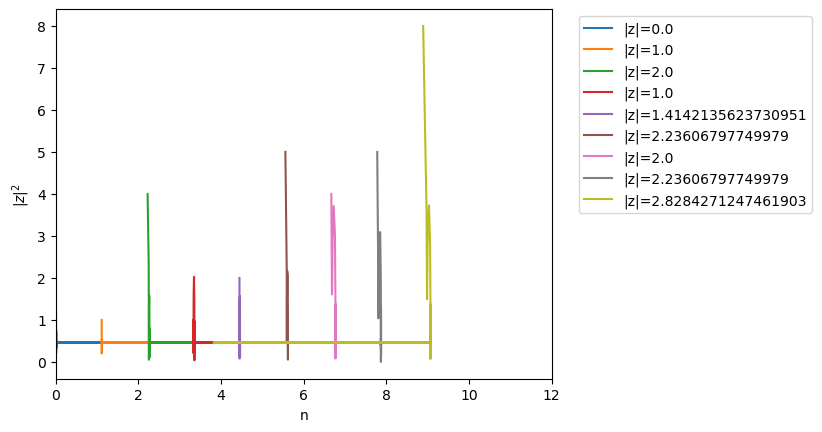

In [214]:
Delta=400
u=30
n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'-',label='|z0|={}'.format(abs(i[0])))
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.xlim(0,12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

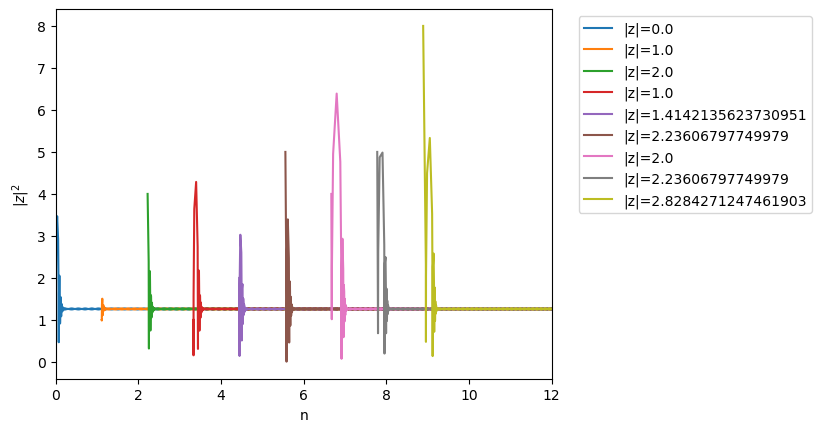

In [218]:
### clipped 
Delta=400
u=50
n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'-',label='|z0|={}'.format(abs(i[0])))
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.xlim(0,12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

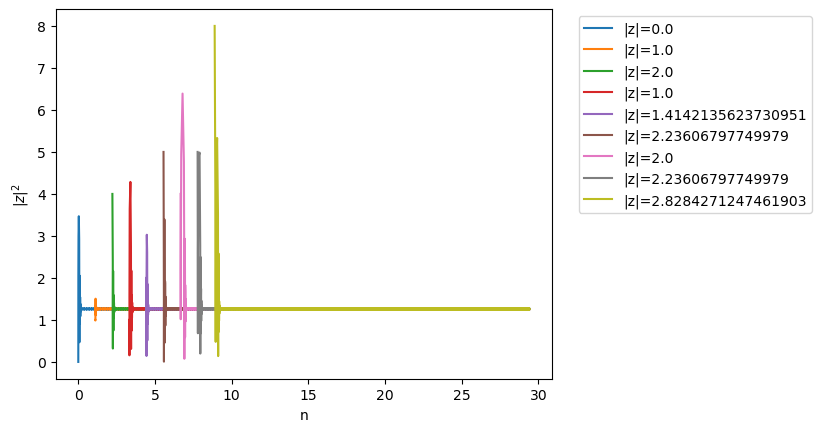

In [220]:
### not clipped 
Delta=400
u=50
n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'-',label='|z0|={}'.format(abs(i[0])))
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

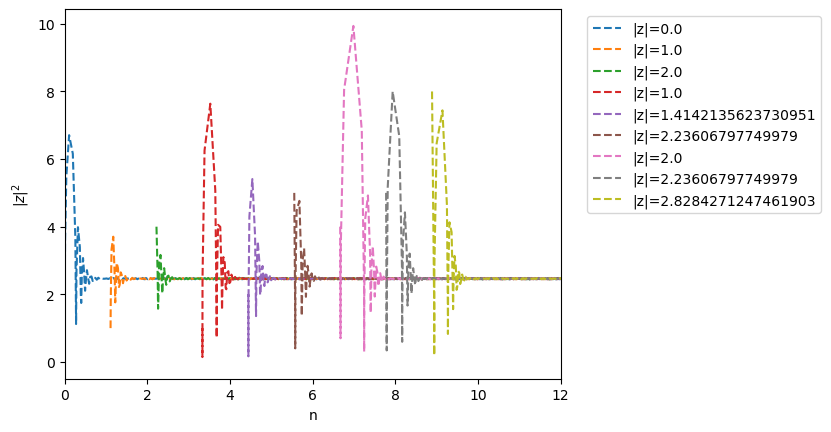

In [216]:
### clipped 
Delta=400
u=70

n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'--',label='|z0|={}'.format(abs(i[0])))
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.xlim(0,12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

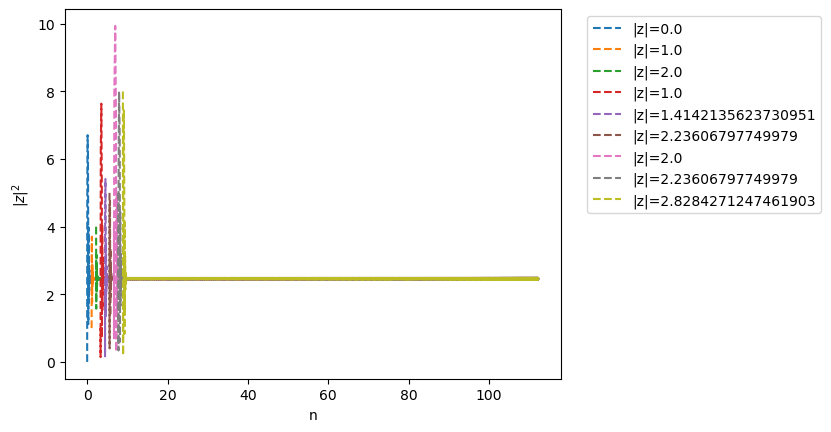

In [221]:
### not clipped 
Delta=400
u=70
n0=np.linspace(0,10,10)
z0=[]
for i in np.linspace(0,2,3):
    for j in np.linspace(0,2,3):
        z0.append(complex(i, j))
#print(z0)
y0_list=list(zip(z0,n0))
#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'--',label='|z0|={}'.format(abs(i[0])))
plt.ylabel('$|z|^2$')
plt.xlabel('n')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

Next: choose similar range for n0 and z0

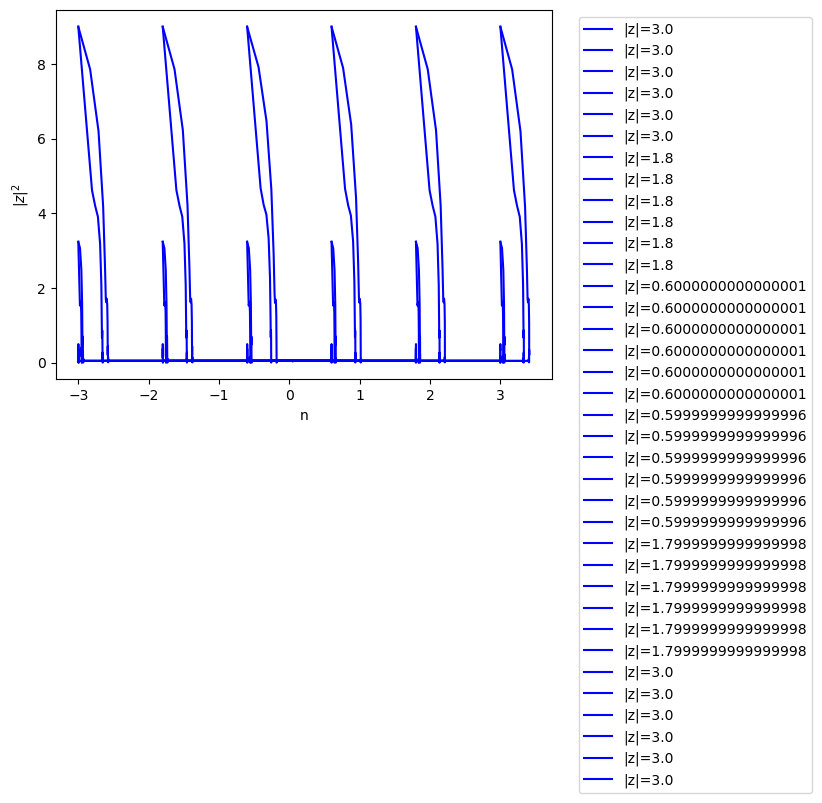

In [226]:
Delta=400
u=10
ic = np.linspace(-3, 3, 6)
y0_list=[]

for r in ic:
    for s in ic:
        y0_list.append( [r+0j, s+0j])

#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    #plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,label='|z0|={}'.format(abs(i[0])))
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

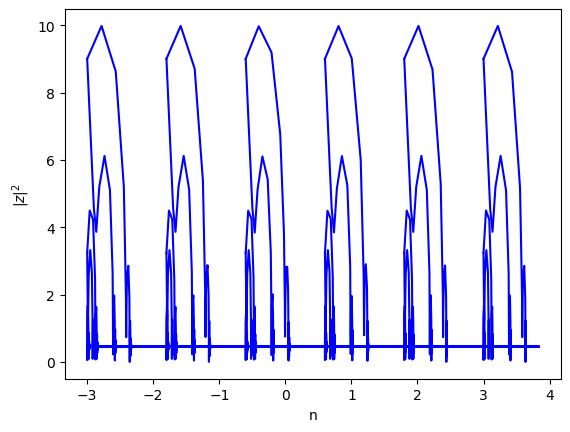

In [228]:
Delta=400
u=30
ic = np.linspace(-3, 3, 6)
y0_list=[]

for r in ic:
    for s in ic:
        y0_list.append( [r+0j, s+0j])

#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    #plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,label='|z0|={}'.format(abs(i[0])))
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

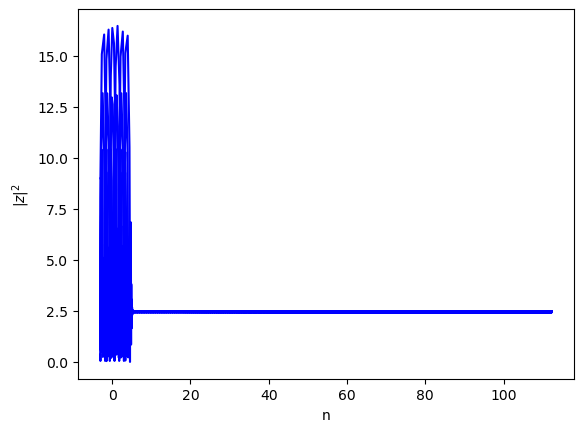

In [229]:
Delta=400
u=70
ic = np.linspace(-3, 3, 6)
y0_list=[]

for r in ic:
    for s in ic:
        y0_list.append( [r+0j, s+0j])

#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    #plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b-',label='|z0|={}'.format(abs(i[0])))
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

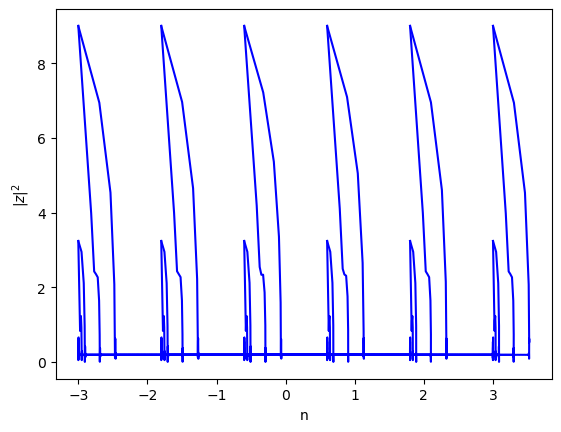

In [232]:
Delta=-200
u=10
ic = np.linspace(-3, 3, 6)
y0_list=[]

for r in ic:
    for s in ic:
        y0_list.append( [r+0j, s+0j])

#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    #plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b-',label='|z0|={}'.format(abs(i[0])))
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

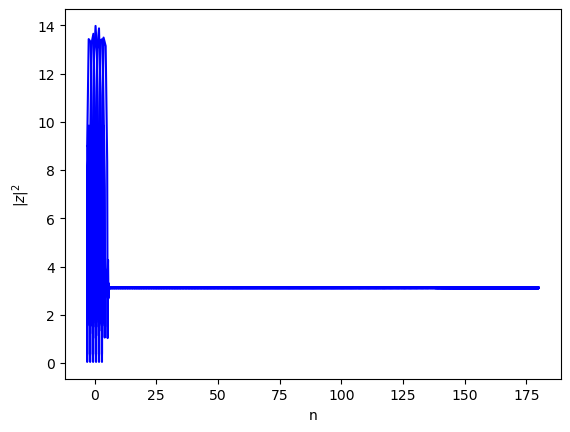

In [233]:
Delta=-200
u=40
ic = np.linspace(-3, 3, 6)
y0_list=[]

for r in ic:
    for s in ic:
        y0_list.append( [r+0j, s+0j])

#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    #plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b-',label='|z0|={}'.format(abs(i[0])))
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

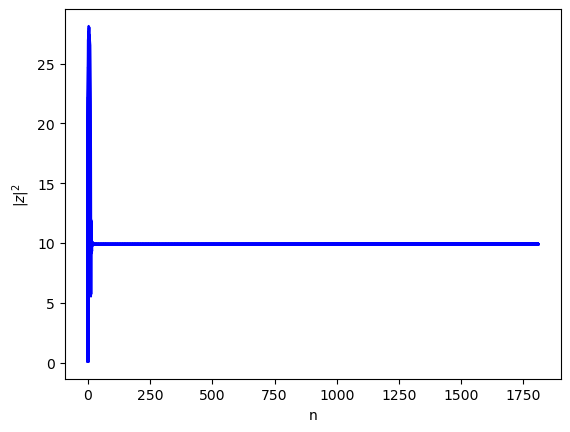

In [234]:
Delta=-200
u=70
ic = np.linspace(-3, 3, 6)
y0_list=[]

for r in ic:
    for s in ic:
        y0_list.append( [r+0j, s+0j])

#print(y0_list)
t_span=[0,200]
for i in y0_list:
    m=[Delta,u,chi,tau,k_T,k,gamma_TPA,gamma_FCA,sigma_FCD]
    ys = solve_ivp(CMT2, t_span, i, args=m)
    #plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b-',label='|z0|={}'.format(abs(i[0])))
    plt.plot(ys.y[1,:],abs(ys.y[0,:])**2,'b')
plt.ylabel('$|z|^2$')
plt.xlabel('n')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

summary: first find the operating point, positive or negative Delta? input u, enough for bistability or not? Threshold? 
1. to see bistability, Delta must be positive,  threshold is though unknown. To be sure in bistability range, 400 is chosen. With negative Delta, there was no bistability. Ever Delta that could have bistability also has a range for u to trigger the bistability. For example, u=30 for Delta=400, or u = 50 for Delta=700.  With u as low as 10, the grapf is more "limitted" rather than "distributed" and more curly and oscillated with u=70. But the phase diagram didn't show difference whether it is in bistability range or not. 
2. with small range of z0, within (-1,1)+(-1,1)j, there are lines in phase diagram. Starting from range of z0, (-3,4)+(-3,4)j, there are curves.
3. low input (eg. 5), with Delta negative or above 400, lines with little oscillation. The more u is, the more curly the lines are. high u (e.g. 50), with 400 or -400 Delta, they are simillar?